In [ ]:
!nvidia-smi

Tue May  9 17:26:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    41W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/dataverse_files.zip -d /content/

In [ ]:
!unzip /content/HAM10000_images_part_1.zip -d /content/HAM10000/
!unzip /content/HAM10000_images_part_2.zip -d /content/HAM10000/

In [ ]:
!unzip /content/ISIC2018_Task3_Test_Images.zip -d /content/

In [ ]:
!unzip /content/HAM10000_segmentations_lesion_tschandl.zip -d /content/

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ham_meta = pd.read_csv('/content/ISIC2018_Task3_Test_GroundTruth.csv')

In [ ]:
ham_meta

lesion_id      image_id     dx    dx_type   age      sex  \
0     HAMTEST_0000000  ISIC_0034524     nv  follow_up  40.0   female   
1     HAMTEST_0000001  ISIC_0034525     nv      histo  70.0     male   
2     HAMTEST_0000002  ISIC_0034526    bkl      histo  70.0     male   
3     HAMTEST_0000003  ISIC_0034527     nv      histo  35.0     male   
4     HAMTEST_0000004  ISIC_0034528     nv  follow_up  75.0   female   
...               ...           ...    ...        ...   ...      ...   
1507  HAMTEST_0001219  ISIC_0036060    bkl  consensus   NaN  unknown   
1508  HAMTEST_0001220  ISIC_0036061     nv  consensus   NaN  unknown   
1509  HAMTEST_0001107  ISIC_0036062  akiec      histo  70.0   female   
1510  HAMTEST_0001221  ISIC_0036063    bkl  consensus   NaN  unknown   
1511  HAMTEST_0001222  ISIC_0036064    bcc      histo   NaN  unknown   

     localization        dataset  
0            back  vidir_molemax  
1         abdomen      rosendahl  
2            back      rosendahl  
3           trunk    vienna_dias  
4           trunk  vidir_molemax  
...           ...            ...  
1507      unknown       external  
1508      unknown       external  
1509         face   vidir_modern  
1510      unknown       external  
1511      unknown       external  

[1512 rows x 8 columns]

In [ ]:
ham_meta['dx'].unique()
ham_meta['image_id'].count()

1512

In [ ]:
isci = pd.read_csv('/content/ISIC2018_Task3_Test_NatureMedicine_AI_Interaction_Benefit.csv')
isci
isci['image_id'].count()

3762

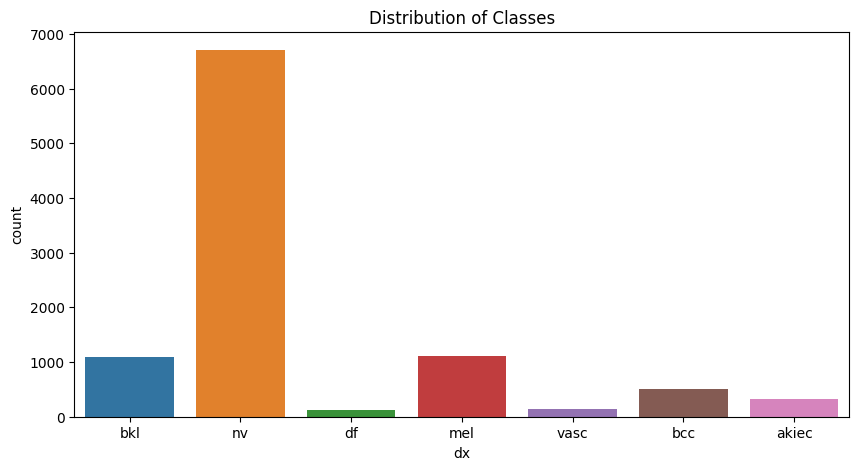

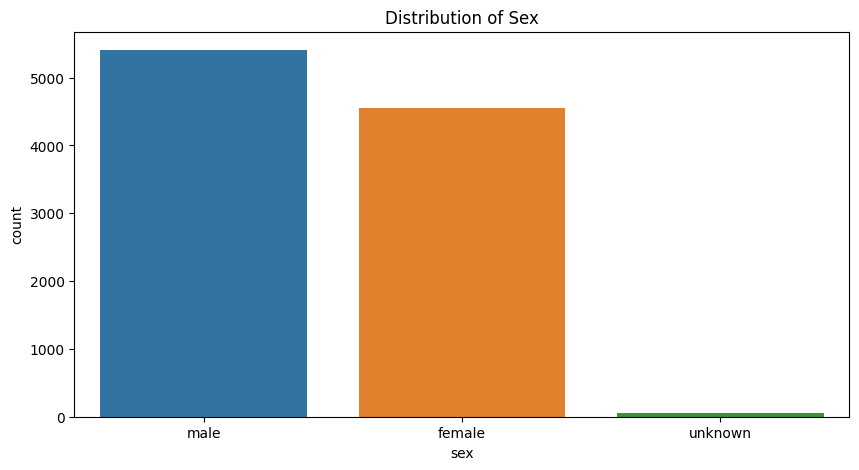

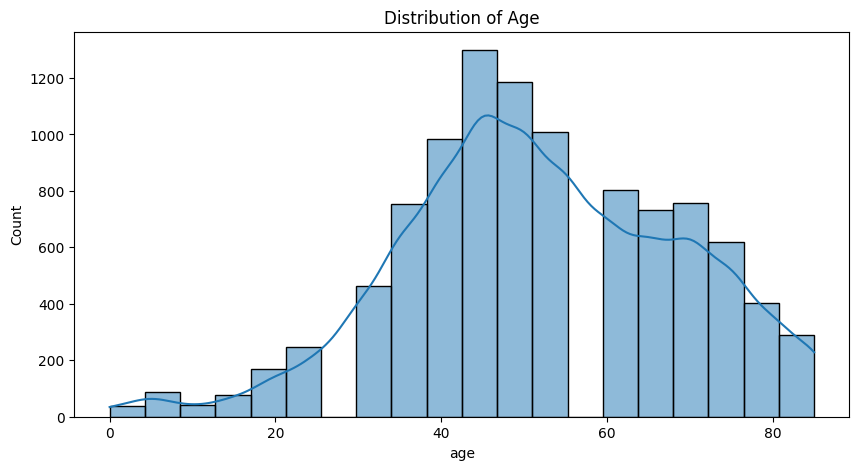

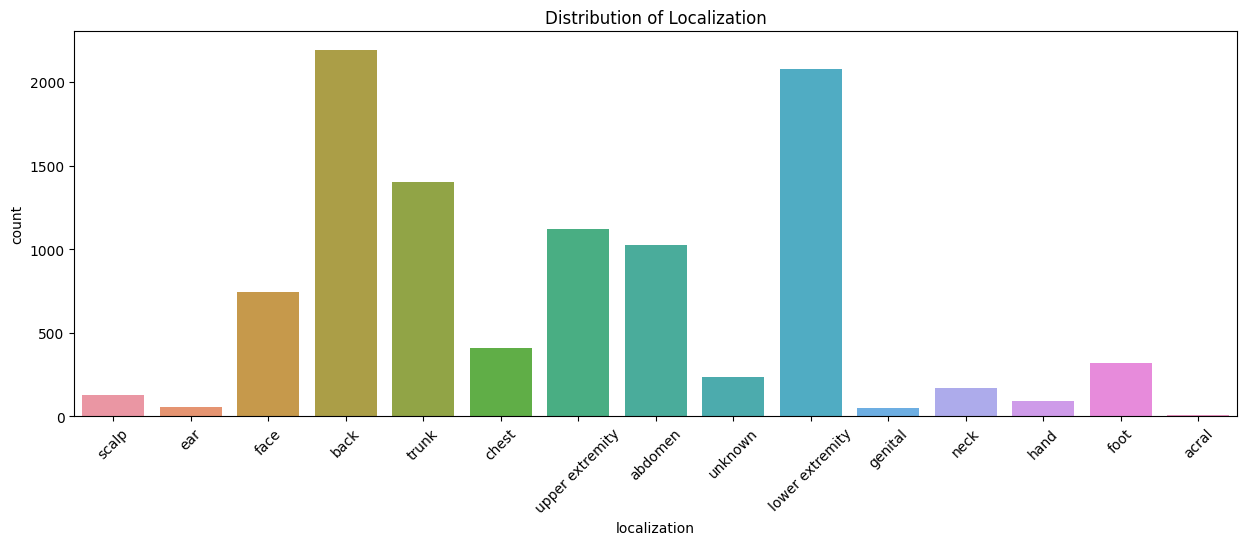

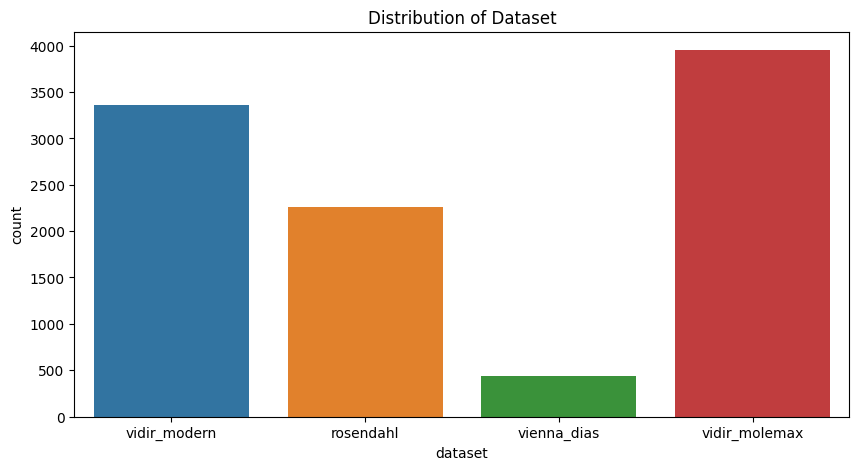

In [ ]:
# Read the CSV file
csv_path = "/content/HAM10000_metadata"
df = pd.read_csv(csv_path)

# Distribution of the 'dx' column (classes)
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='dx')
plt.title("Distribution of Classes")
plt.show()

# Distribution of the 'sex' column
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='sex')
plt.title("Distribution of Sex")
plt.show()

# Distribution of the 'age' column
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title("Distribution of Age")
plt.show()

# Distribution of the 'localization' column
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='localization')
plt.title("Distribution of Localization")
plt.xticks(rotation=45)
plt.show()

# Distribution of the 'dataset' column
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='dataset')
plt.title("Distribution of Dataset")
plt.show()


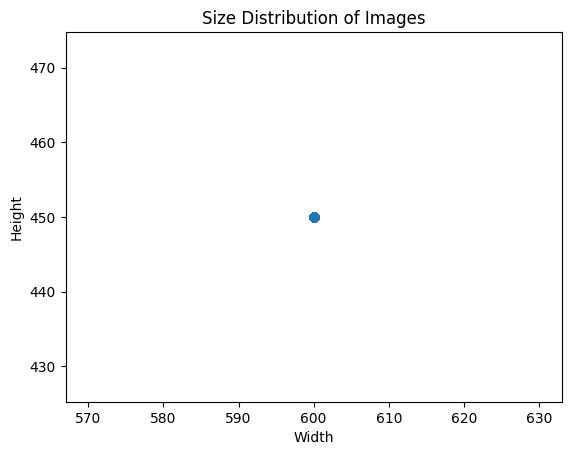

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

image_folder = "/content/HAM10000"

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith((".jpg", ".png", ".jpeg"))]

# Collect the dimensions of all images
dimensions = []
for img_file in image_files:
    img = Image.open(os.path.join(image_folder, img_file))
    width, height = img.size
    dimensions.append((width, height))

# Separate widths and heights
widths, heights = zip(*dimensions)

# Plot the size distribution
plt.scatter(widths, heights)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Size Distribution of Images")
plt.show()


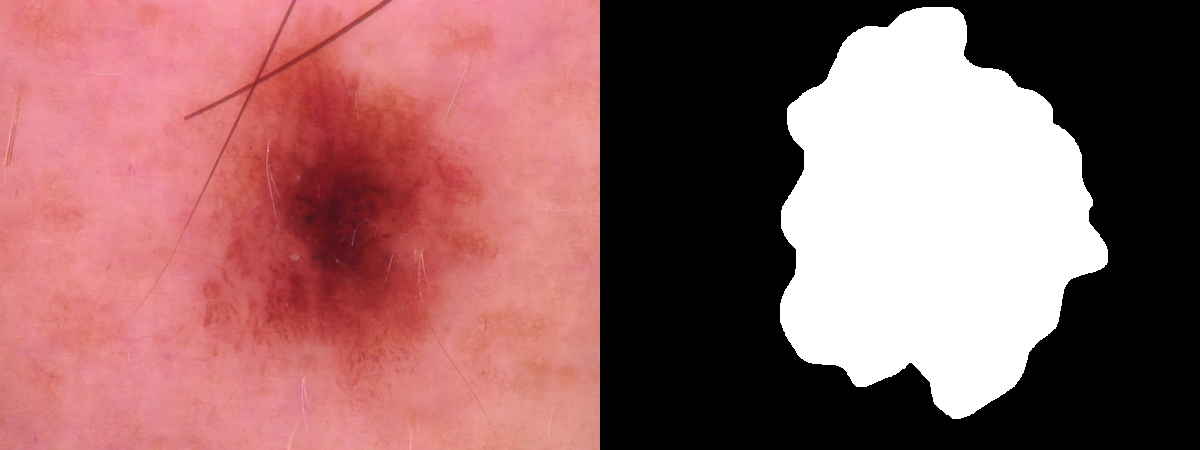

In [ ]:
from PIL import Image
image1 = Image.open('/content/HAM10000/ISIC_0024306.jpg')
seg1 = Image.open('/content/HAM10000_segmentations_lesion_tschandl/ISIC_0024306_segmentation.png')

width1, height1 = image1.size
width2, height2 = seg1.size


merged_image = Image.new('RGB', (width1 + width2, max(height1, height2)))

merged_image.paste(image1, (0, 0))
merged_image.paste(seg1, (width1, 0))

merged_image.show()

In [ ]:
import os

HAM_1 = "/content/HAM10000"
Masks = "/content/HAM10000_segmentations_lesion_tschandl"
test = "/content/ISIC2018_Task3_Test_Images"
img = [f for f in os.listdir(HAM_1) if f.endswith('.jpg')]
mask = [f for f in os.listdir(Masks) if f.endswith('.png')]
testing = [f for f in os.listdir(test) if f.endswith('.jpg')]

num_images_1 = len(img)
mask_1 = len(mask)
test_1 = len(testing)
print(f'Ham 1 : {num_images_1}')
print(f'Masks : {mask_1}')
print(f'Test : {test_1}')


Ham 1 : 10015
Masks : 10015
Test : 1511


In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.models import resnet50
from sklearn.model_selection import train_test_split
import cv2
import pandas as pd

In [ ]:
df.head(100)

lesion_id      image_id   dx dx_type   age     sex localization  \
0   HAM_0000118  ISIC_0027419  bkl   histo  80.0    male        scalp   
1   HAM_0000118  ISIC_0025030  bkl   histo  80.0    male        scalp   
2   HAM_0002730  ISIC_0026769  bkl   histo  80.0    male        scalp   
3   HAM_0002730  ISIC_0025661  bkl   histo  80.0    male        scalp   
4   HAM_0001466  ISIC_0031633  bkl   histo  75.0    male          ear   
..          ...           ...  ...     ...   ...     ...          ...   
95  HAM_0000746  ISIC_0027023  bkl   histo  60.0    male         face   
96  HAM_0001473  ISIC_0029022  bkl   histo  70.0    male         face   
97  HAM_0003007  ISIC_0025388  bkl   histo  40.0  female      abdomen   
98  HAM_0003007  ISIC_0028080  bkl   histo  40.0  female      abdomen   
99  HAM_0002957  ISIC_0026153  bkl   histo  70.0    male         back   

         dataset  
0   vidir_modern  
1   vidir_modern  
2   vidir_modern  
3   vidir_modern  
4   vidir_modern  
..           ...  
95  vidir_modern  
96  vidir_modern  
97  vidir_modern  
98  vidir_modern  
99  vidir_modern  

[100 rows x 8 columns]

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2

# Your configurations
image_size = 128

# Define the paths to the CSV file, image folder and mask folder
csv_path = '/content/HAM10000_metadata'
img_folder_path = '/content/HAM10000'
mask_folder_path = '/content/HAM10000_segmentations_lesion_tschandl'



def mask_to_bbox(mask):
    mask_np = np.array(mask, dtype=np.uint8)
    if np.count_nonzero(mask_np) == 0:
        return None
    contours, _ = cv2.findContours(mask_np, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    x, y, w, h = cv2.boundingRect(contours[0])
    cx = (x + w/2) / 128.0
    cy = (y + h/2) / 128.0
    nw = w / 128.0
    nh = h / 128.0
    return cx, cy, nw, nh

# Read the CSV file
df = pd.read_csv(csv_path)

# Get unique class names from the 'dx' column
class_names = df['dx'].unique()

# Create a dictionary to map class names to integers
class_to_int = {class_name: i for i, class_name in enumerate(class_names)}

# Replace class names with integer values in the 'dx' column
df['dx'] = df['dx'].map(class_to_int)

# Split the data into training and validation sets
train_data, val_data = train_test_split(df, test_size=0.2, random_state=42)



# Create train and validation directories for images and labels
train_img_output_folder = "/content/train/images"
train_label_output_folder = "/content/train/labels"
val_img_output_folder = "/content/val/images"
val_label_output_folder = "/content/val/labels"
if not os.path.exists(train_img_output_folder):
    os.makedirs(train_img_output_folder)
if not os.path.exists(train_label_output_folder):
    os.makedirs(train_label_output_folder)
if not os.path.exists(val_img_output_folder):
    os.makedirs(val_img_output_folder)
if not os.path.exists(val_label_output_folder):
    os.makedirs(val_label_output_folder)

# Copy train images and labels to train directories
for i in range(len(train_data)):
    img_id = train_data['image_id'].iloc[i]
    img_path = os.path.join(img_folder_path, f"{img_id}.jpg")
    mask_path = os.path.join(mask_folder_path, f"{img_id}_segmentation.png")
    
    img = Image.open(img_path).convert('RGB')
    mask = Image.open(mask_path).convert('L')
    
    img = img.resize((image_size, image_size))
    mask = mask.resize((image_size, image_size))
    
    bbox = mask_to_bbox(mask)
    if bbox is None:
        continue
    
    x_center, y_center, norm_width, norm_height = bbox
       # Get the integer value of the class for each image
    class_int = train_data['dx'].iloc[i]
    label = f"{class_int} {x_center:.6f} {y_center:.6f} {norm_width:.6f} {norm_height:.6f}"
    
    img_save_path = os.path.join(train_img_output_folder, f"{img_id}.jpg")
    label_save_path = os.path.join(train_label_output_folder, f"{img_id}.txt")
    
    img.save(img_save_path, format='JPEG', quality=100)
    with open(label_save_path, 'w') as f:
        f.write(label)

# Copy validation images and labels to validation directories
for i in range(len(val_data)):
    img_id = val_data['image_id'].iloc[i]
    img_path = os.path.join(img_folder_path, f"{img_id}.jpg")
    mask_path = os.path.join(mask_folder_path, f"{img_id}_segmentation.png")
    
    img = Image.open(img_path).convert('RGB')
    mask = Image.open(mask_path).convert('L')
    
    img = img.resize((image_size, image_size))
    mask = mask.resize((image_size, image_size))
    
    bbox = mask_to_bbox(mask)
    if bbox is None:
        continue
    
    x_center, y_center, norm_width, norm_height = bbox
    
    class_int = val_data['dx'].iloc[i]
    label = f"{class_int} {x_center:.6f} {y_center:.6f} {norm_width:.6f} {norm_height:.6f}"

    img_save_path = os.path.join(val_img_output_folder, f"{img_id}.jpg")
    label_save_path = os.path.join(val_label_output_folder, f"{img_id}.txt")
    
    img.save(img_save_path, format='JPEG', quality=100)
    with open(label_save_path, 'w') as f:
        f.write(label)


In [ ]:
for class_name, class_int in class_to_int.items():
    print(f"{class_name} is mapped to {class_int}")

bkl is mapped to 0
nv is mapped to 1
df is mapped to 2
mel is mapped to 3
vasc is mapped to 4
bcc is mapped to 5
akiec is mapped to 6


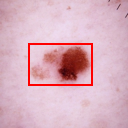

In [ ]:
from PIL import Image, ImageDraw

img_path = "/content/train/images/ISIC_0024313.jpg"
label_path = "/content/train/labels/ISIC_0024313.txt"

img = Image.open(img_path)
draw = ImageDraw.Draw(img)

with open(label_path, 'r') as f:
    label = f.readline().strip()

class_id, x_center, y_center, norm_width, norm_height = label.split()
x_center = float(x_center)
y_center = float(y_center)
norm_width = float(norm_width)
norm_height = float(norm_height)

x_min = (x_center - norm_width / 2) * img.width
y_min = (y_center - norm_height / 2) * img.height
x_max = (x_center + norm_width / 2) * img.width
y_max = (y_center + norm_height / 2) * img.height

draw.rectangle((x_min, y_min, x_max, y_max), outline='red', width=2)
img.show()

In [ ]:
import os
import pandas as pd
from PIL import Image

# Your configurations
image_size = 128

# Define the paths to the CSV file, image folder and mask folder
img_folder_path = '/content/ISIC2018_Task3_Test_Images'
test_img_output_folder = '/content/test/images'

# Create test directory for images
if not os.path.exists(test_img_output_folder):
    os.makedirs(test_img_output_folder)

# Copy test images to test directory and resize
for img_file in os.listdir(img_folder_path):
    if img_file == ".DS_Store":
        continue
    
    img_id = os.path.splitext(img_file)[0]
    img_path = os.path.join(img_folder_path, img_file)
    
    img = Image.open(img_path).convert('RGB')
    img = img.resize((image_size, image_size))
    
    img_save_path = os.path.join(test_img_output_folder, f"{img_id}.jpg")
    
    img.save(img_save_path, format='JPEG', quality=100)


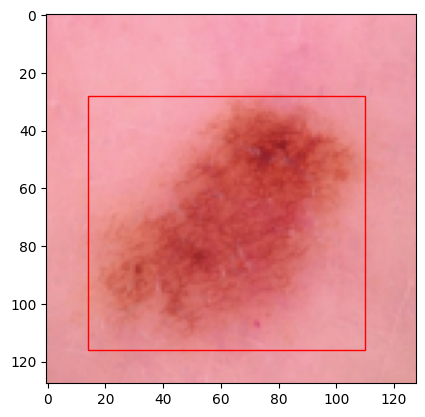

In [ ]:
import os
import matplotlib.pyplot as plt

# Define the paths to the image and label files
img_path = "/content/train/images/ISIC_0024311.jpg"
label_path = "/content/train/labels/ISIC_0024311.txt"


# Read the image and label files
img = plt.imread(img_path)
with open(label_path, 'r') as f:
    label = f.readline().strip()

# Extract the bounding box coordinates
_, x_center, y_center, norm_width, norm_height = map(float, label.split())
x = int((x_center - norm_width/2) * image_size)
y = int((y_center - norm_height/2) * image_size)
width = int(norm_width * image_size)
height = int(norm_height * image_size)

# Plot the image with bounding box
plt.imshow(img)
rect = plt.Rectangle((x, y), width, height, fill=False, edgecolor='r')
plt.gca().add_patch(rect)
plt.show()


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 15647, done.
remote: Counting objects: 100% (254/254), done.
remote: Compressing objects: 100% (156/156), done.
remote: Total 15647 (delta 130), reused 173 (delta 98), pack-reused 15393
Receiving objects: 100% (15647/15647), 14.65 MiB | 2.31 MiB/s, done.
Resolving deltas: 100% (10658/10658), done.
/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.7 MB/s eta 0:00:00


In [ ]:
def generate_txt_files(df, img_folder, label_folder, txt_file):
    with open(os.path.join('/content/yolov5', txt_file), 'w') as f:
        for img_id in df['image_id']:
            img_path = os.path.join(img_folder, f"{img_id}.jpg")
            label_path = os.path.join(label_folder, f"{img_id}.txt")
            f.write(f"{img_path}\n")

generate_txt_files(train_data, "/content/train/images", "/content/train/labels", 'train.txt')
generate_txt_files(val_data,  "/content/val/images", "/content/val/labels", 'val.txt')

In [ ]:
import os

class_names = ['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec']

data = {'train': '/content/yolov5/train.txt',
        'val': '/content/yolov5/val.txt',
        'nc': len(class_names),
        'names': {i: name for i, name in enumerate(class_names)}}

with open(os.path.join('/content/yolov5', 'HAM.yaml'), 'w') as file:
    for key, value in data.items():
        if key == 'names':
            file.write(f"{key}:\n")
            for i, name in value.items():
                file.write(f"  {i}: {name}\n")
        else:
            file.write(f'{key}: {value}\n')


In [ ]:
!python train.py --img 128 --batch 16 --epochs 500 --data /content/yolov5/HAM.yaml --cfg models/yolov5m.yaml --weights yolov5m.pt --name yolov5s_ham10000


train: weights=yolov5m.pt, cfg=models/yolov5m.yaml, data=/content/yolov5/HAM.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=128, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_ham10000, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-163-g016e046 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, bo

In [ ]:
from google.colab import drive
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Define paths
dir_to_zip = '/content/yolov5/runs/train/yolov5s_ham10000'
zip_path = '/content/yolov5s_ham10000'
drive_path = '/content/drive/MyDrive'

# Create zip archive
shutil.make_archive(zip_path, 'zip', dir_to_zip)

# Copy zip file to Google Drive
shutil.copyfile('/content/yolov5s_ham10000.zip', f"{drive_path}/yolov5s_ham10000.zip")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/yolov5s_ham10000.zip'

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/yolov5s_ham10000/weights/best.pt --img 128 --conf 0.4 --source /content/test/images --save-txt --save-conf


detect: weights=['/content/yolov5/runs/train/yolov5s_ham10000/weights/best.pt'], source=/content/test/images, data=data/coco128.yaml, imgsz=[128, 128], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-163-g016e046 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20877180 parameters, 0 gradients, 47.9 GFLOPs
image 1/1511 /content/test/images/ISIC_0034524.jpg: 128x128 1 nv, 7.5ms
image 2/1511 /content/test/images/ISIC_0034525.jpg: 128x128 1 nv, 7.5ms
image 3/1511 /content/test/images/ISIC_0034526.jpg: 128x128 (no detections), 7.6ms
image 4/151

In [ ]:
import os
import shutil

source_dir = '/content/yolov5/runs/detect/exp2/labels'
target_dir = '/content/test/labels'

if not os.path.exists(target_dir):
    os.makedirs(target_dir)

for file_name in os.listdir(source_dir):
    if file_name.endswith('.txt'):
        shutil.move(os.path.join(source_dir, file_name), os.path.join(target_dir, file_name))


In [ ]:
import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Your configurations
image_size = 128

# Define the paths to the image and label directories
img_folder_path = "/content/test/images"
label_folder_path = "/content/test/labels"

# Create a PDF document to save the plots
pdf_path = "/content/output2.pdf"
class_mapping = {
        0: "bkl",
        1: "nv",
        2: "df",
        3: "mel",
        4: "vasc",
        5: "bcc",
        6: "akiec"
    }

with PdfPages(pdf_path) as pdf:
    # Loop through the image files and plot them with bounding boxes
    for img_file in os.listdir(img_folder_path):
        # Read the image file
        img_path = os.path.join(img_folder_path, img_file)
        img = plt.imread(img_path)

        # Read the label file
        label_file = os.path.splitext(img_file)[0] + ".txt"
        label_path = os.path.join(label_folder_path, label_file)
        if not os.path.exists(label_path):
            print(f"No bounding box detected in {img_file}")
            fig, ax = plt.subplots()
            ax.imshow(img)
            plt.axis('off')
            pdf.savefig()
            plt.close()
            continue
        with open(label_path, 'r') as f:
            label = f.readline().strip()

        # Extract the bounding box coordinates
        label_class, x_center, y_center, norm_width, norm_height, confidence = map(float, label.split())
        x = int((x_center - norm_width/2) * image_size)
        y = int((y_center - norm_height/2) * image_size)
        width = int(norm_width * image_size)
        height = int(norm_height * image_size)

        # Assuming the class is stored as an integer variable called "class_id"
        class_name = class_mapping[label_class]
        # Print class label and confidence
        if confidence >= 0.6:
            label_text = f"[{class_name}] Lesion - {confidence*100:.2f}%"
        else:
            label_text = f"{confidence*100:.2f}%"

        # Plot the image with bounding box
        fig, ax = plt.subplots()
        ax.imshow(img)
        rect = plt.Rectangle((x, y), width, height, fill=False, edgecolor='r')
        ax.add_patch(rect)
        plt.text(x, y-10, label_text, color='r')
        plt.axis('off')
        pdf.savefig()
        plt.close()


No bounding box detected in ISIC_0035433.jpg
No bounding box detected in ISIC_0034966.jpg
No bounding box detected in ISIC_0034637.jpg
No bounding box detected in ISIC_0035436.jpg
No bounding box detected in ISIC_0035737.jpg
No bounding box detected in ISIC_0034907.jpg
No bounding box detected in ISIC_0034526.jpg
No bounding box detected in ISIC_0035446.jpg
No bounding box detected in ISIC_0035905.jpg
No bounding box detected in ISIC_0034695.jpg
No bounding box detected in ISIC_0034814.jpg
No bounding box detected in ISIC_0035583.jpg
No bounding box detected in ISIC_0035511.jpg


In [ ]:
# Set paths
file_to_move = '/content/output2.pdf'
drive_path = '/content/drive/MyDrive/'

# Move file to Google Drive
shutil.move(file_to_move, drive_path)

'/content/drive/MyDrive/output2.pdf'

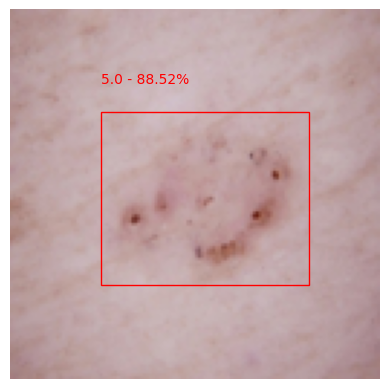

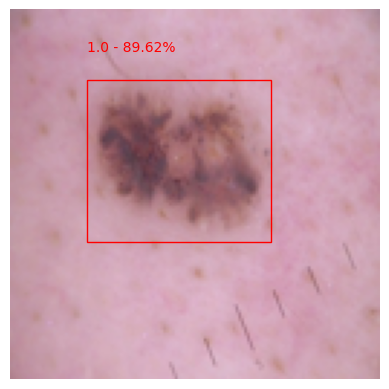

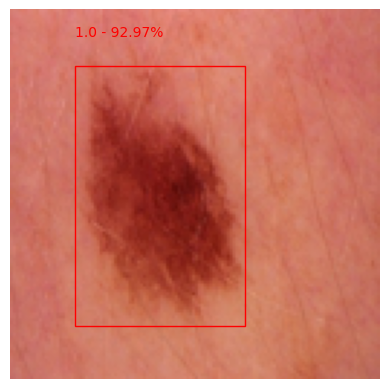

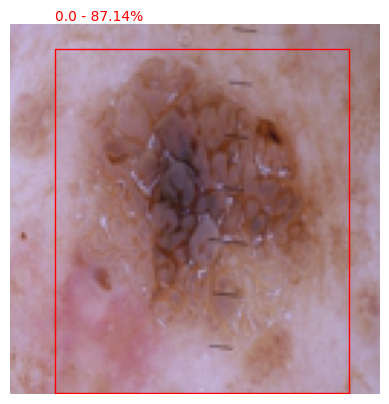

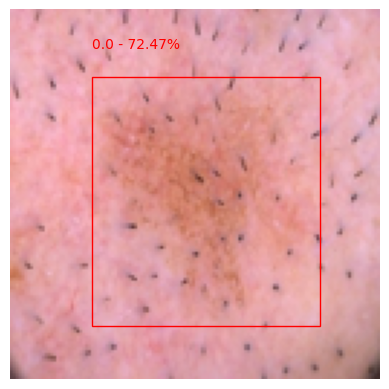

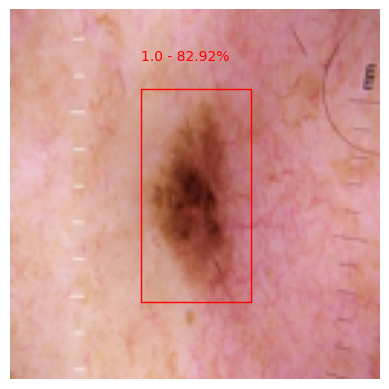

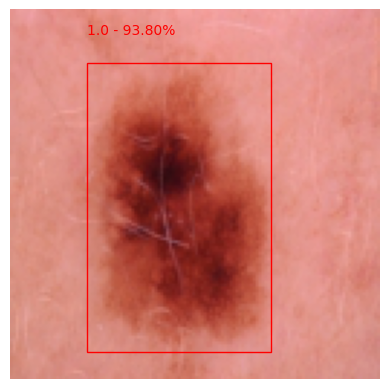

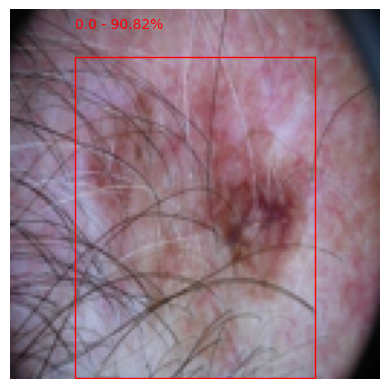

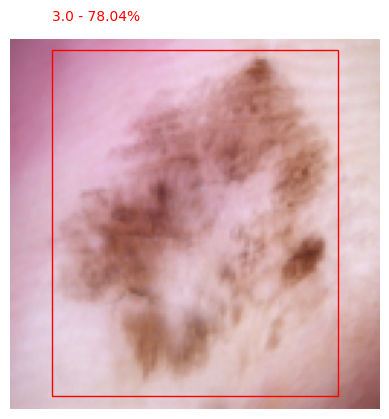

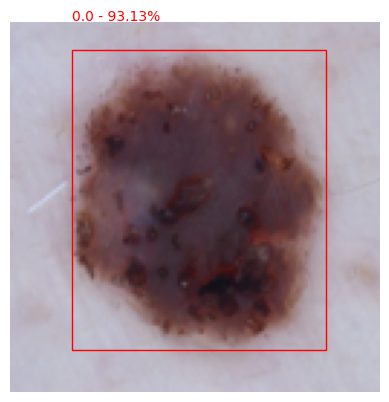

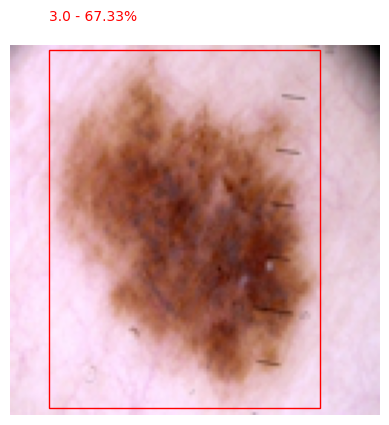

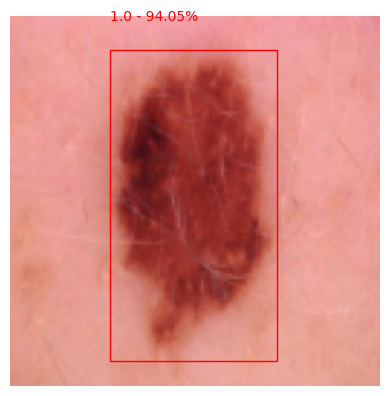

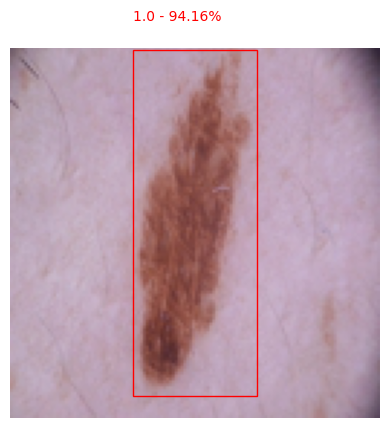

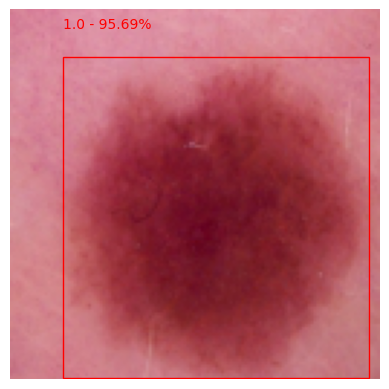

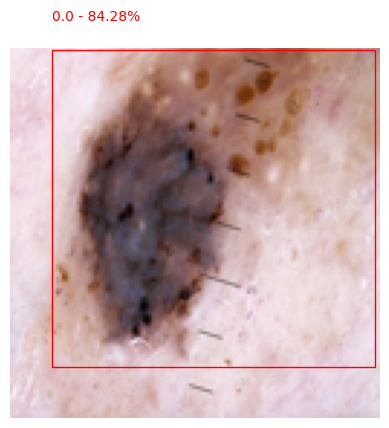

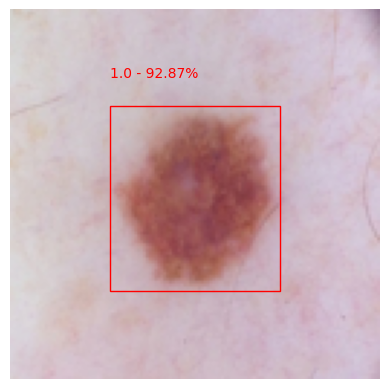

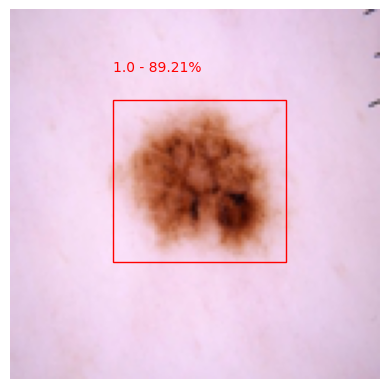

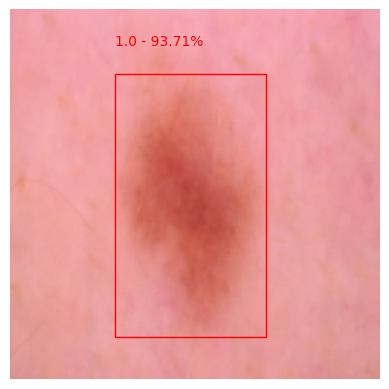

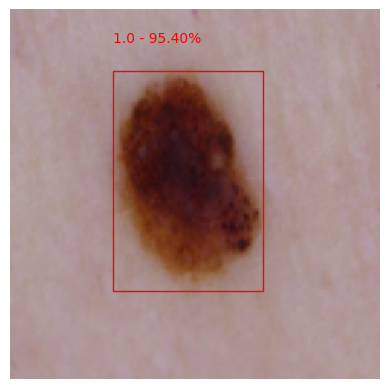

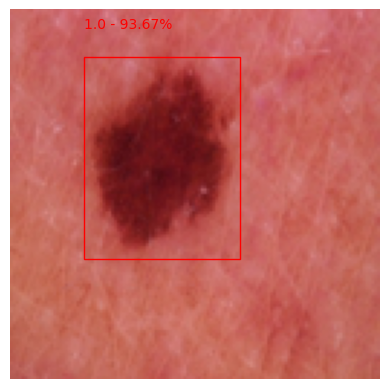

In [ ]:
import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Your configurations
image_size = 128
num_samples = 20

# Define the paths to the image and label directories
img_folder_path = "/content/test/images"
label_folder_path = "/content/test/labels"

# Create a PDF document to save the plots
pdf_path = "/content/output2.pdf"
with PdfPages(pdf_path) as pdf:
    # Loop through the image files and plot them with bounding boxes
    counter = 0
    for img_file in os.listdir(img_folder_path):
        if counter >= num_samples:
            break  # exit loop when desired number of plots have been generated

        # Read the image file
        img_path = os.path.join(img_folder_path, img_file)
        img = plt.imread(img_path)

        # Read the label file
        label_file = os.path.splitext(img_file)[0] + ".txt"
        label_path = os.path.join(label_folder_path, label_file)
        if not os.path.exists(label_path):
            print(f"No bounding box detected in {img_file}")
            fig, ax = plt.subplots()
            ax.imshow(img)
            plt.axis('off')
            pdf.savefig()
            plt.show()
            continue
        with open(label_path, 'r') as f:
            label = f.readline().strip()

        # Extract the bounding box coordinates
        classe, x_center, y_center, norm_width, norm_height, confidence = map(float, label.split())
        x = int((x_center - norm_width/2) * image_size)
        y = int((y_center - norm_height/2) * image_size)
        width = int(norm_width * image_size)
        height = int(norm_height * image_size)

        # Print class label and confidence
        if confidence >= 0.4:
            label_text = f"{classe} - {confidence*100:.2f}%"
        else:
            label_text = f"{confidence*100:.2f}%"

        # Plot the image with bounding box
        fig, ax = plt.subplots()
        ax.imshow(img)
        rect = plt.Rectangle((x, y), width, height, fill=False, edgecolor='r')
        ax.add_patch(rect)
        plt.text(x, y-10, label_text, color='r')
        plt.axis('off')
        pdf.savefig()
        plt.show()

        counter += 1


In [ ]:
import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Your configurations
image_size = 128

# Define the paths to the image and label directories
img_folder_path = "/content/test/images"
label_folder_path = "/content/test/labels"

# Create a PDF document to save the plots
pdf_path = "/content/output1.pdf"
with PdfPages(pdf_path) as pdf:
    # Loop through the image files and plot them without bounding boxes
    for img_file in os.listdir(img_folder_path):
        # Read the image file
        img_path = os.path.join(img_folder_path, img_file)
        img = plt.imread(img_path)

        # Read the label file
        label_file = os.path.splitext(img_file)[0] + ".txt"
        label_path = os.path.join(label_folder_path, label_file)
        if os.path.exists(label_path):
            continue  # Skip the image if the label file exists

        print(f"No bounding box detected in {img_file}")
        fig, ax = plt.subplots()
        ax.imshow(img)
        plt.axis('off')
        pdf.savefig()
        plt.show()
        plt.close()
